# Introduction to Image Processing on Grayscale Images
This notebook explains some basic concepts for Image Processing using Python, numpy and skimage.

## Preparation

In [30]:
import matplotlib.pyplot as plt

# plots directly in the notebook
%matplotlib inline 

# make figures larger (reduce if figures are too wide for your screen)
plt.rcParams["figure.figsize"] = (5,5)

# if you have a high-dpi monitor
#%config InlineBackend.figure_format = 'retina' 

import numpy as np
import matplotlib.pyplot as plt
import skimage

## Fun with grayscale images
Grayscale images are 2-dimensional numpy arrays. Values represent the intensity of each pixel.

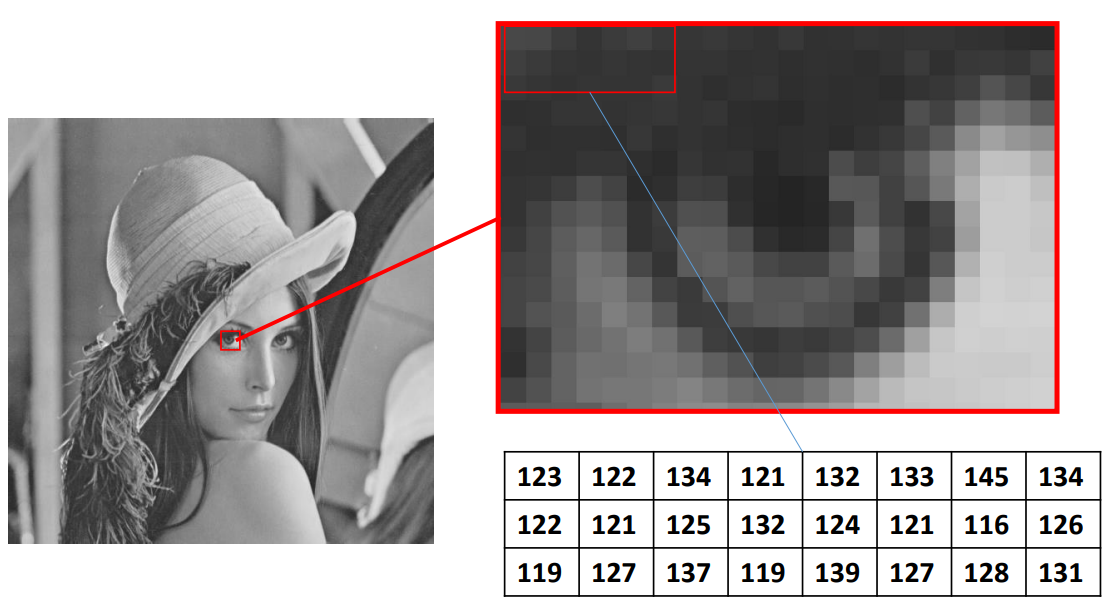

### Note: our perceived brightness is mediated by our brain. It might not match the true intensity values in the image!
Our brains are very good at ignoring intensity differences due to irrelevant things (eg lighting, shadows, etc). See [this amazing illusion](https://en.wikipedia.org/wiki/Checker_shadow_illusion).

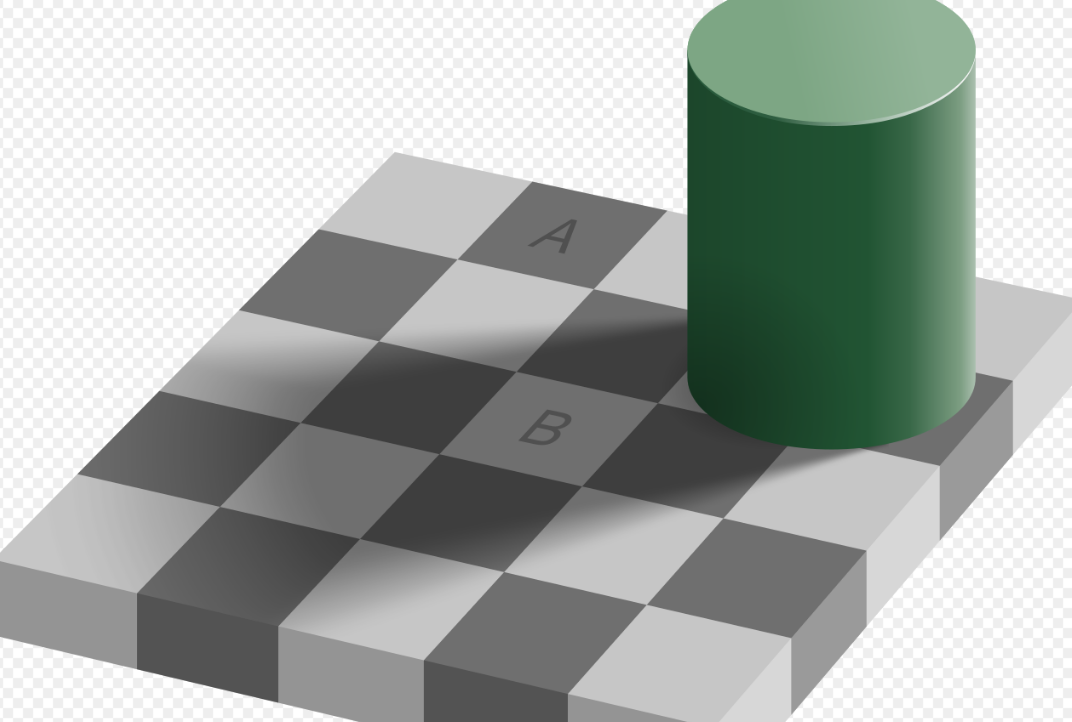

Also see these related links:
- [link 1](https://twitter.com/Rainmaker1973/status/1500048475676823553?t=OgwFGQwv0nnncDHqnwhdSA&s=19)
- [link 2](https://twitter.com/Rainmaker1973/status/1631745106289078272?t=atj_mpuDW0A9C6pANBIVwg&s=19)

### Load and display a grayscale image

In [2]:
import numpy as np
import skimage
import skimage.data
import skimage.io
im = skimage.data.camera()
print(type(im))
# to read from a file: skimage.io.imread("myimage.png")
print(im.shape)
print(im.dtype)

<class 'numpy.ndarray'>
(512, 512)
uint8


### Be wary of `uint8` arithmetic

uint8 means one byte per pixel (values 0-255)

*Warning!*  Be careful when working with `uint8` data!  uint8 arithmetic wraps around.

In [3]:
print(np.array([255],dtype="uint8") + 1)

a = np.array([100], dtype="uint8")
print(a, a*2, a*3)

[0]
[100] [200] [44]


### Display a `uint8` grayscale image
To display a grayscale image, use `imshow`.  Tip: always use `vmin` and `vmax` parameters to set the colors that should map to black and white.  Different versions of matplotlib have different behaviors otherwise.

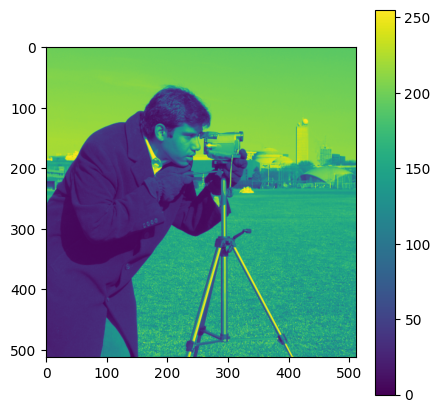

In [4]:
plt.imshow(im, vmin=0, vmax=255)
plt.colorbar()

Note the viridis colormap.  In image processing, we normally display grayscale images with a grayscale colormap.

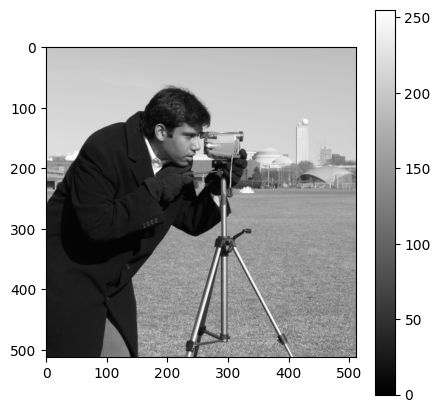

In [5]:
plt.imshow(im,
           vmin=0,   # value which maps to black
           vmax=255, # value which maps to white
           cmap="gray")
plt.colorbar();

Read the [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) for imshow!

### Floating point images
`uint8` images should be always displayed with a range from 0 (black) to 255 (white).
Instead, floating point images conventionally use a range from 0 (black) to 1 (white), unless specified otherwise.

float64


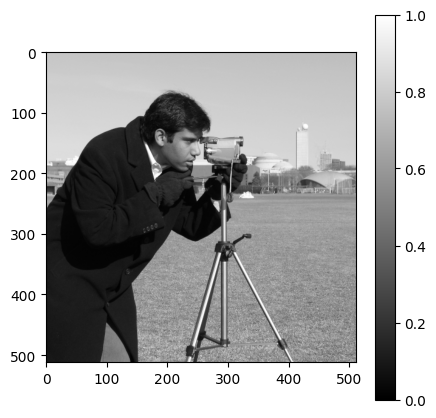

In [19]:
im_float = im/255
# 0 stays 0; 255 becomes 1

print(im_float.dtype)
plt.imshow(im_float, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

## Simple geometric transformations
Can you guess what each of the following operations does on the image?

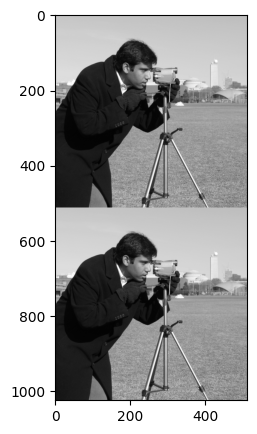

In [7]:
plt.imshow(np.vstack((im_float, im_float)),
           cmap="gray", vmin=0, vmax=1);

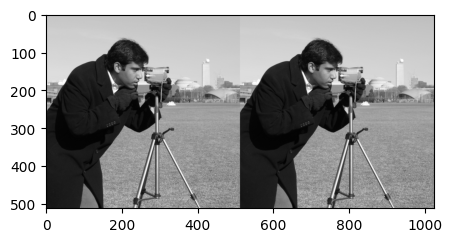

In [26]:
plt.imshow(np.hstack([im_float, im_float]),
           cmap="gray", vmin=0, vmax=1);

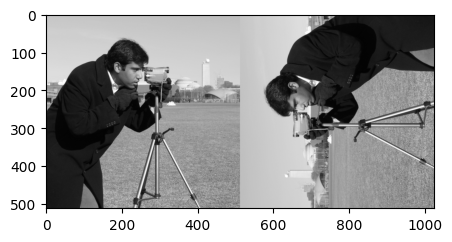

In [9]:
plt.imshow(np.hstack((
                im_float,
                im_float.T
           )), cmap="gray", vmin=0, vmax=1);

### Exercise 1
#### Point 1.1

Generate a 5x5 float array of uniformly-distributed random numbers between 0 and 1. Print the array on screen as numbers, then visualize it as a grayscale image.

Use [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

Then, generate a version that is 100 pixels wide and 50 pixels tall (without printing it, makes no sense)

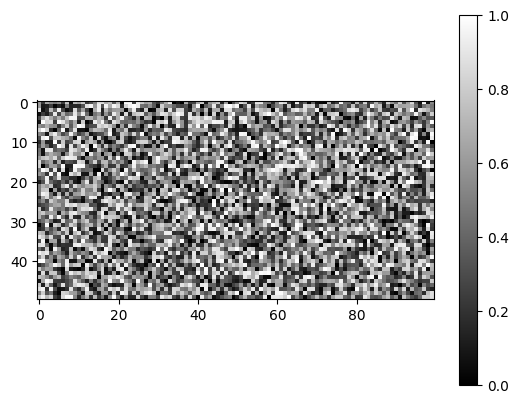

In [14]:
im = np.random.uniform(0, 1, [50, 100])

plt.imshow(im, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

#### Point 1.2
Repeat, but this time generate uniform numbers in the interval $[0,3]$.
How do you expect the image to look compared to the previous one if:
- you keep `vmin=0` and `vmax=1`
- if `vmin=0` and `vmax=3`

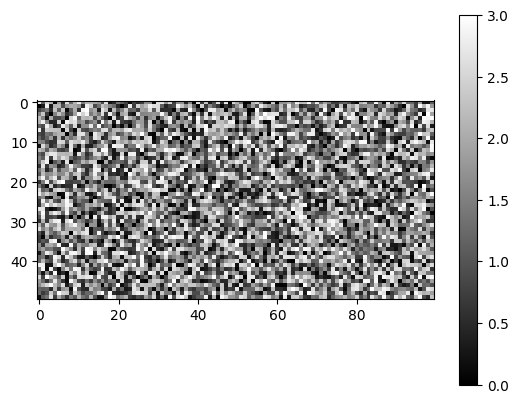

In [16]:
im = np.random.uniform(0, 3, [50, 100])

plt.imshow(im, cmap="gray", vmin=0, vmax=3)
plt.colorbar()

### Exercise 2
#### Point 2.1
Generate a striped image like this (8x8 pixels).

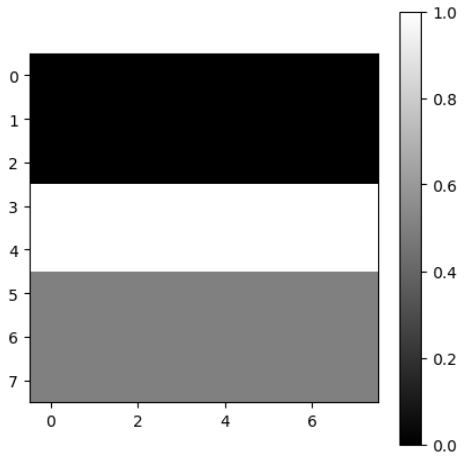

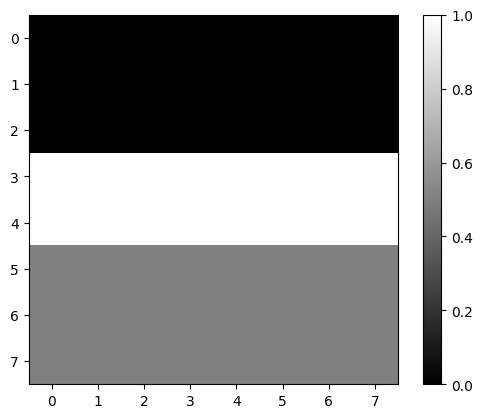

In [29]:
im = np.ones([8, 8])
im[0:3,:] = 0
im[5:9,:] = 0.5

plt.imshow(im, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

#### Point 2.2
Generate a checkerboard image like this (8x8 pixels).

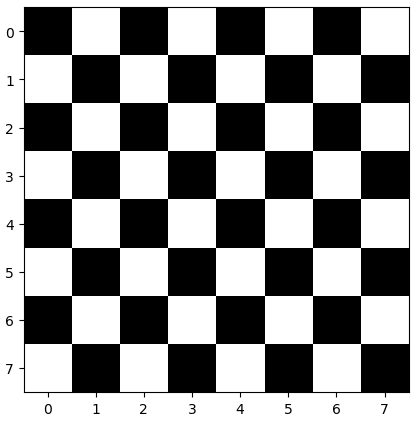

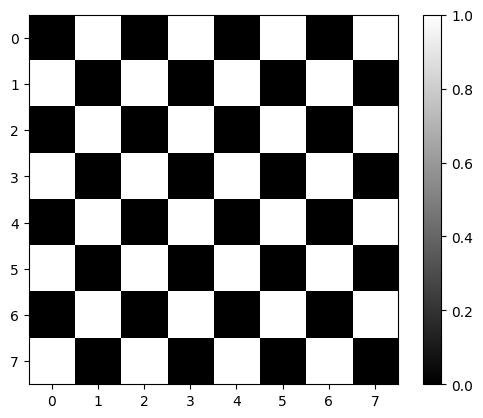

In [69]:
im = np.zeros([8,8])

im[0::2,1::2] = 1
im[1::2,0::2] = 1

#im = np.indices((8, 8)).sum(axis=0) % 2

plt.imshow(im, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

#### Point 2.3
Generate a striped image like this (8x8 pixels)

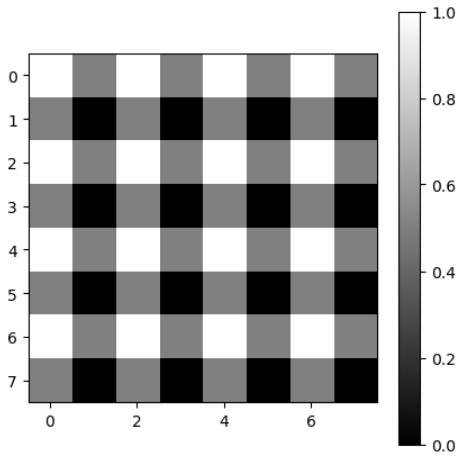

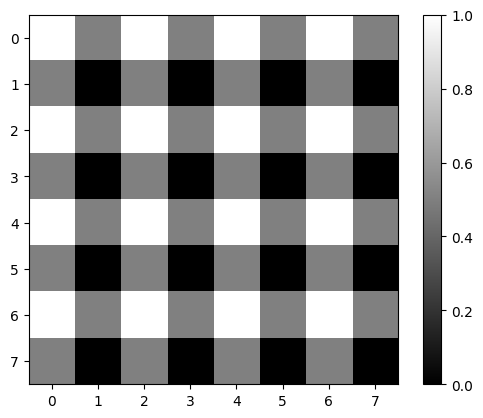

In [74]:
im = np.ones([8,8])

im[0::2,1::2] = 0.5
im[1::2,0::2] = 0.5
im[1::2,1::2] = 0

#im = np.indices((8, 8)).sum(axis=0) % 2

plt.imshow(im, cmap="gray", vmin=0, vmax=1)
plt.colorbar()

#### Point 2.4 (difficult)
Generate an image like this (200x50 pixels).

Tips: Look at the docs for [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [`np.tile`](https://numpy.org/doc/stable/reference/generated/numpy.tile.html), [`np.rot90`](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html).

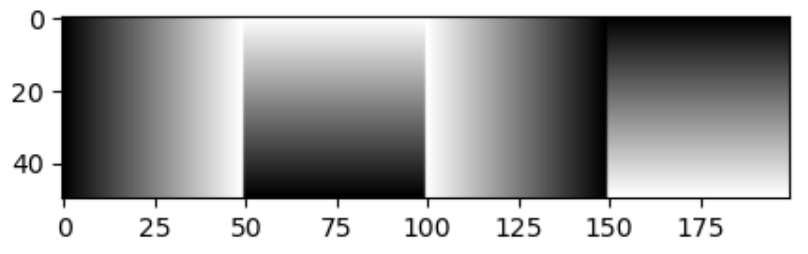

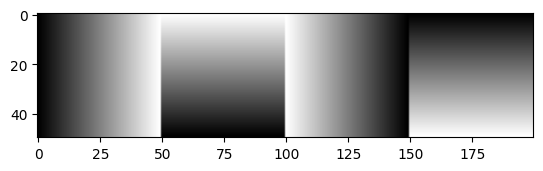

In [28]:
col = np.linspace(0, 1, 50).reshape(-1, 1)
im = np.tile(col, (1, 50))

im = np.hstack([
    np.rot90(im, 1),
    np.rot90(im, 2),
    np.rot90(im, 3),
    np.rot90(im, 4)
])

plt.imshow(im, cmap="gray", vmin=0, vmax=1)

### Exercise 3
Read the grayscale image file `snoopy.png` (find it in the data folder) and write simple code to generate an image like the one below (note that snoopy is facing to the right!)

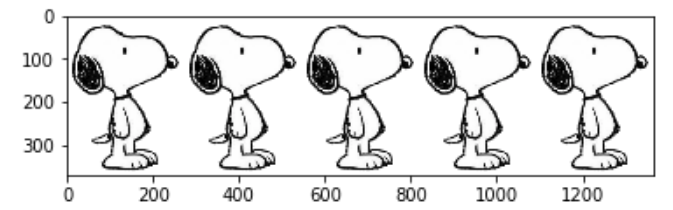

(371, 273)


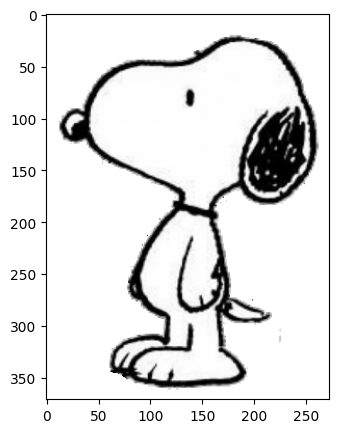

In [33]:
# Solution
im = skimage.io.imread("data/snoopy.png")
print(im.shape)

plt.imshow(im, cmap="gray", vmin=0, vmax=255)

### Exercise 4
Read the grayscale image file `snoopy.png` and write simple code to generate an image like the one below.

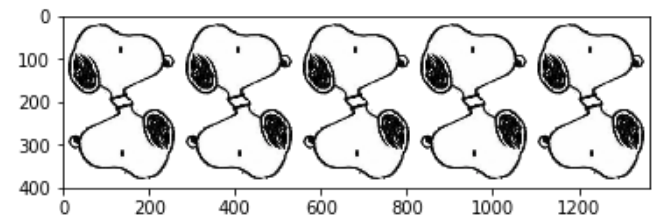

In [ ]:
# Solution
im = skimage.io.imread("data/snoopy.png")

# ...

### Exercise 5 (hard): disappearing snoopy
Read the grayscale image file `snoopy.png` and write simple code to generate an image like the one below.  Tip: convert the image to floating point!
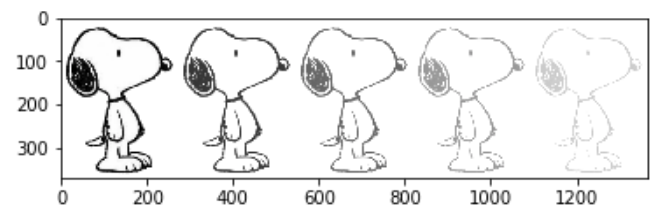

In [ ]:
# Solution
im = skimage.io.imread("data/snoopy.png")
im = im/255 # tip: use floating point values

# ...

### Exercise 6: frame maker
Write a python function `makeframe(im, framewidth)` that takes a grayscale float image `im` as input and returns the same image surrounded by a gray border that is wide `framewidth` pixels; note that the output image is larger than the input (even though the display size might not be)!

Then use this function in some code that loads a grayscale image, computes the image with the frame, then displays side by side in two subplots of the same figure:
- The original image
- The image with the frame

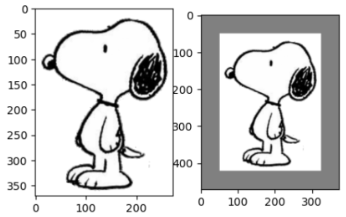

See solution template for an example.

In [ ]:
# Solution
def makeframe(im, framewidth):
    ret = ...
    #
    return ret
    
im = skimage.io.imread("data/snoopy.png")
im = im/255 # tip: use floating point values
im_frame = makeframe(im, 50)
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
#ax0.imshow(im, cmap="gray")
#ax1.imshow(im_frame, cmap="gray")

## Exercise 7 (hard): fancy frame maker

Write a python function that makes a frame for an image, by tiling a smaller (downsampled) version of that image.  To downsample an image, pick one row every $n$, and one column every $n$. For example, for $n=7$, you'll obtain an image whose width and height is approximately $1/7$ of the original.

Start by just implementing this for the top and bottom portions of the frame. Then, if you have time, try extending it to the sides.  Here is how it looks for a downsampling factor of 7.

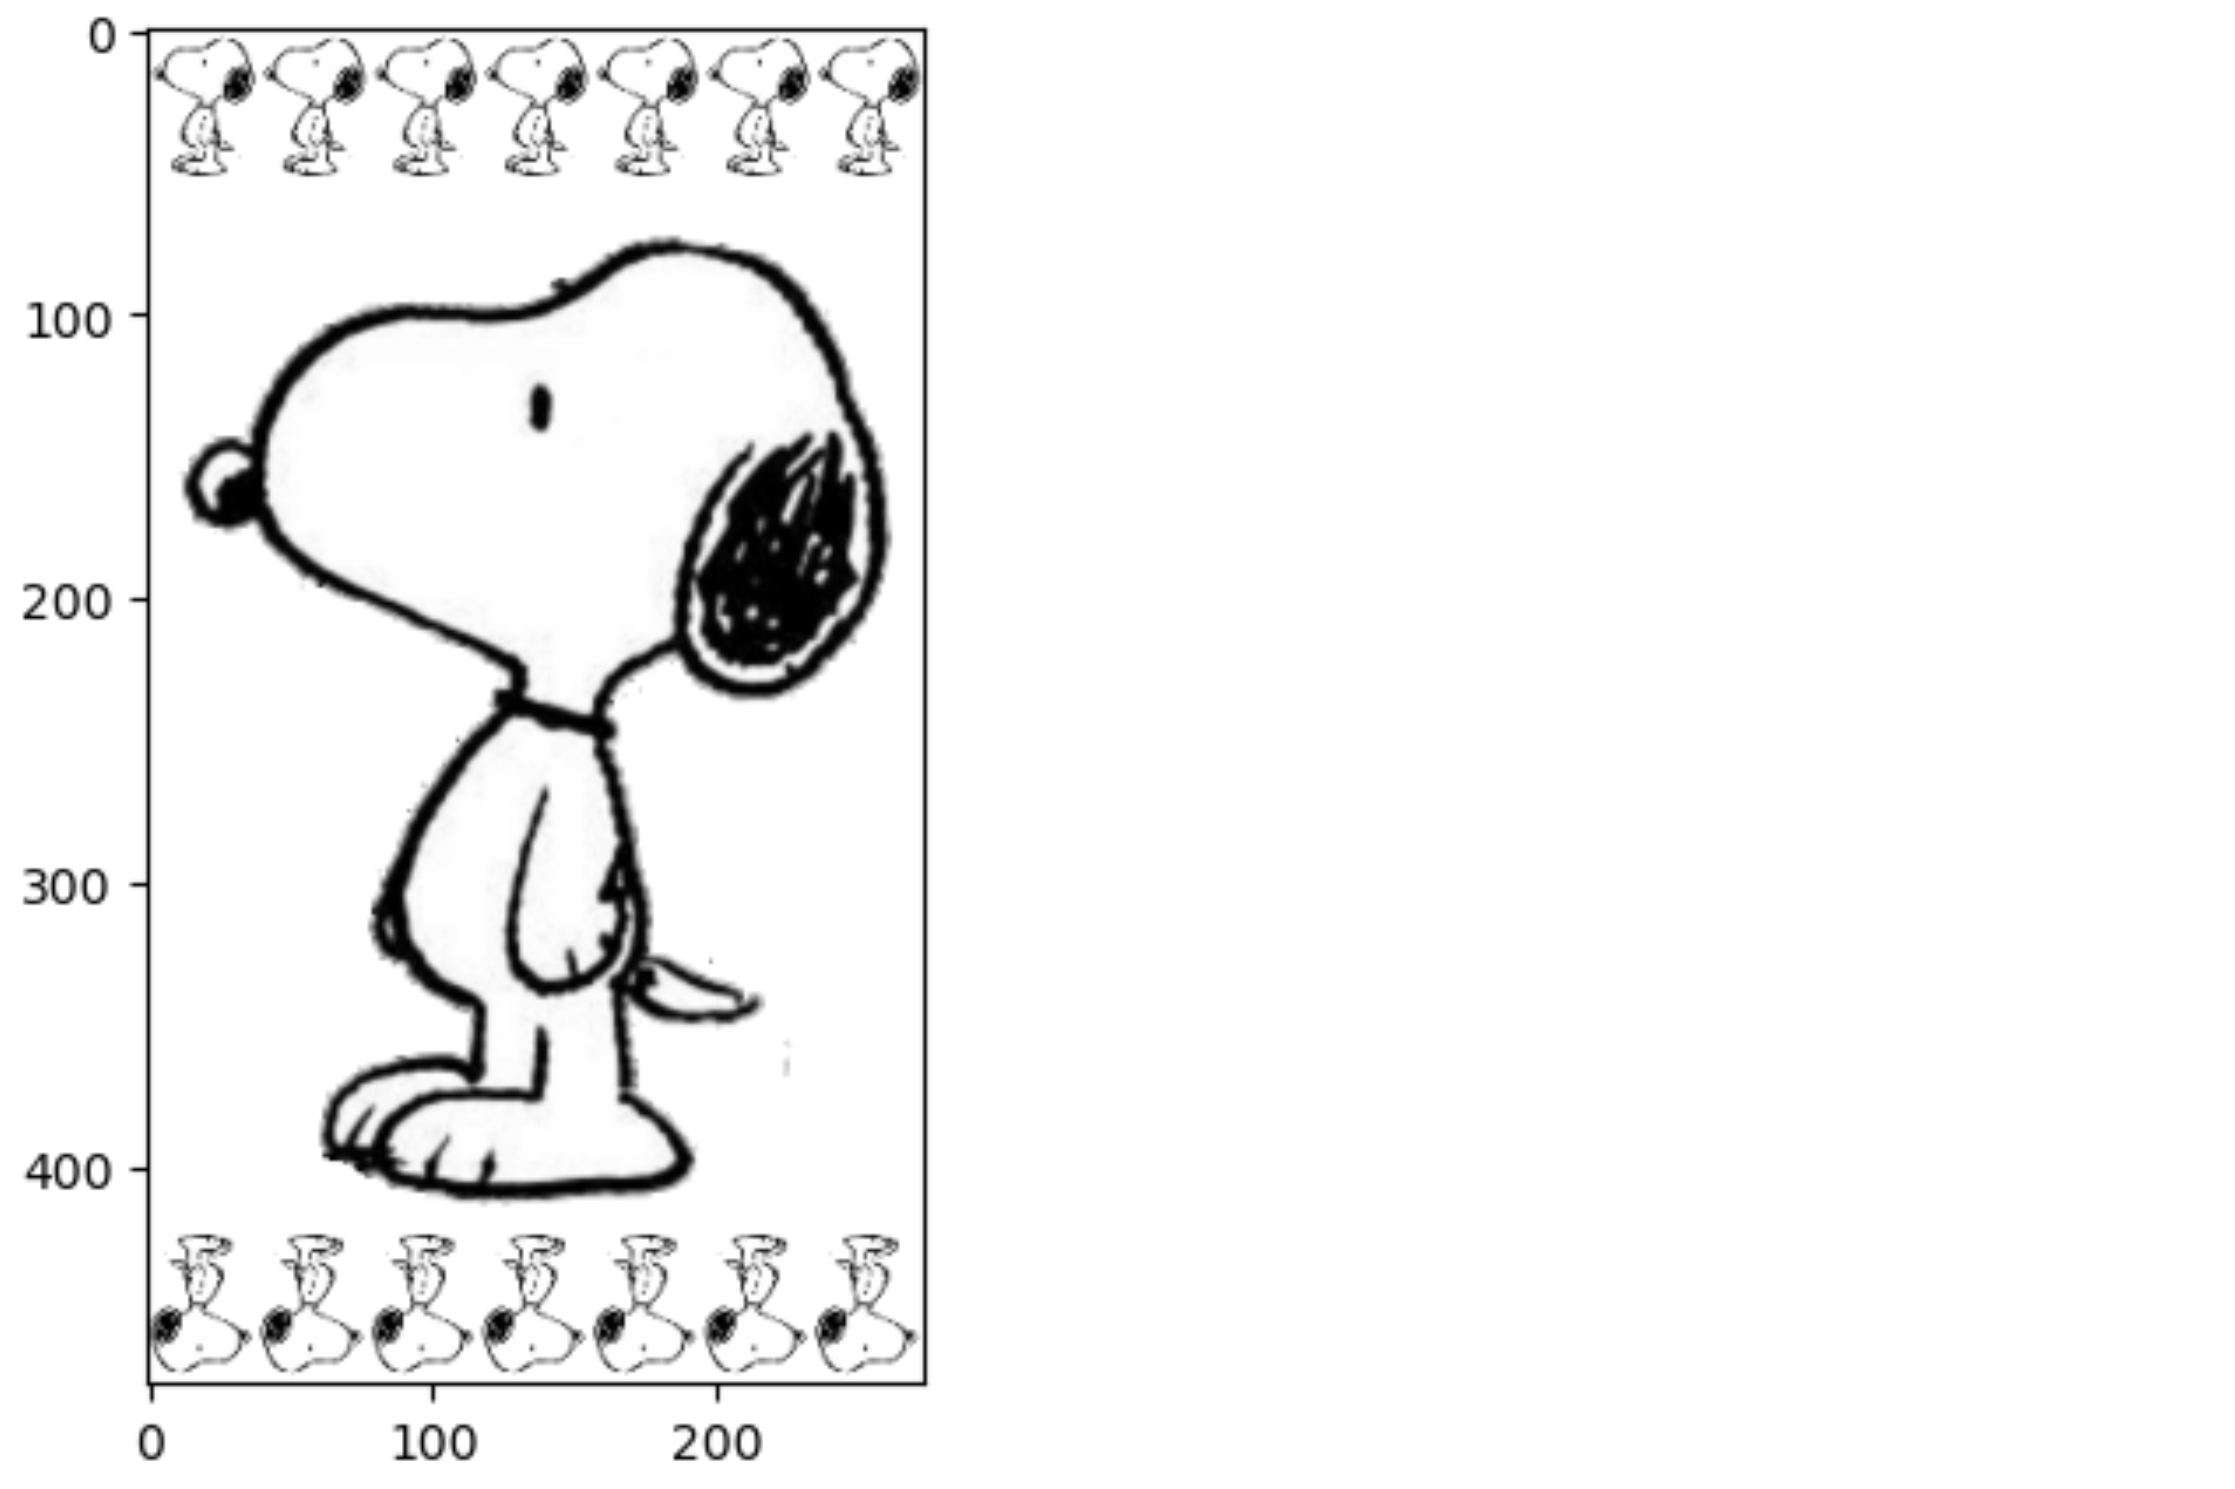


In [ ]:
# Solution
def makefancyframe(im, factor=7):
    im_small = im[::factor, ::factor]
    ...
    
im = skimage.io.imread("data/snoopy.png")
im = im/255 # tip: use floating point values
im_frame = makefancyframe(im, 7)
#plt.imshow(im_frame, cmap="gray")